In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [5]:
setwd("/Users/jacqueline/Dropbox/UW-M/628 Data Science Practium/Module 1")
BodyFat<-read.csv("BodyFat.csv",header=T)
BodyFat<-select(BodyFat,-IDNO)

In order to make model more reliable, here we select 201 data as train data
and the rest as test data.
All the following models are based on the train data we select.

In [7]:
set.seed(124)
train_index<-sample(1:252,size=201,replace = F)
train<-BodyFat[train_index,]
test<-BodyFat[-train_index,]
bodyfat<-train

We need to do some data cleaning first. 
Notice that there are some points outside of the cloud of data, 
which means they’re outlier candidates, that is, either leverage points or outliers in Y.

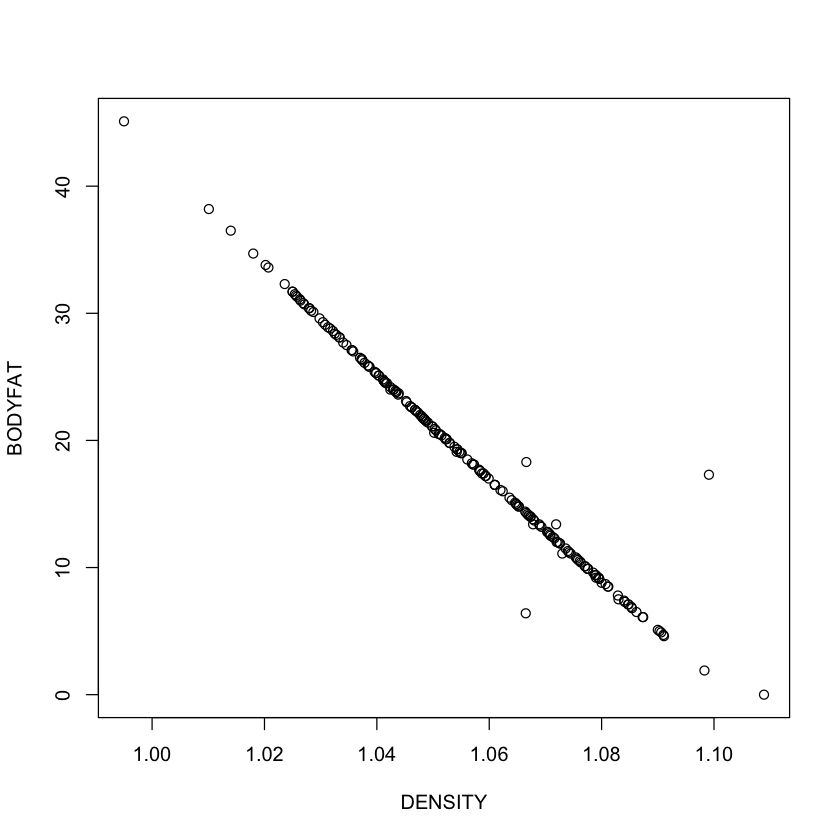

In [8]:
plot(BODYFAT~1/DENSITY,data=bodyfat)

Since BODYFAT and DENSITY are equal variables, we do not consider density in the model.

In [9]:
summary(model <- lm(BODYFAT ~ ., data=subset(bodyfat,select = c(-DENSITY))))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-14.09533450,18.45288494,-0.7638553,4.459213e-01
AGE,0.05126176,0.03426287,1.4961313,1.363143e-01
WEIGHT,-0.06978177,0.05619338,-1.2418149,2.158685e-01
HEIGHT,-0.06056976,0.10840117,-0.5587556,5.770006e-01
ADIPOSITY,0.14466868,0.31288821,0.4623654,6.443597e-01
NECK,-0.70027826,0.27632207,-2.5342828,1.209228e-02
CHEST,-0.03464596,0.11256740,-0.3077797,7.585944e-01
ABDOMEN,0.89380549,0.10058813,8.8857945,5.414372e-16
HIP,-0.27875068,0.16424833,-1.6971294,9.134484e-02
THIGH,0.20426076,0.15827994,1.2905031,1.984779e-01


Rule of thumb: classify as leverages anything above 4/(n-p). (Fox, 1997)

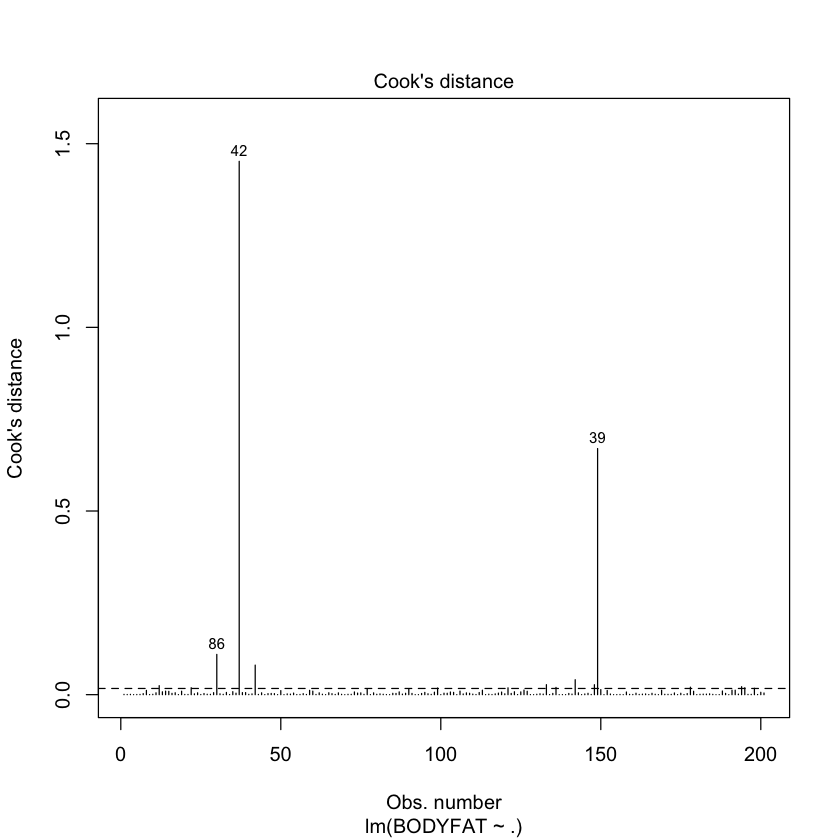

In [10]:
plot(model, which=4)
abline(h = 4/(252-15),lty=2)

See 42nd guy
   BODYFAT DENSITY AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST
42    31.7   1.025  44    205   29.5      29.9 36.6   106
ABDOMEN   HIP THIGH KNEE ANKLE BICEPS FOREARM WRIST
42   104.3 115.5  70.6 42.5  23.7   33.6    28.7  17.4

Obviously, he has extremely short height, which is less than 30. We consider it as a typo
and delete this observation from data.


Call:
lm(formula = BODYFAT ~ ., data = bodyfat[-37, -2])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6891 -2.8642 -0.1469  3.0541  9.8201 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -44.87202   39.65872  -1.131   0.2593    
AGE           0.05324    0.03436   1.549   0.1230    
WEIGHT       -0.15131    0.10866  -1.393   0.1654    
HEIGHT        0.41160    0.54929   0.749   0.4546    
ADIPOSITY     0.79134    0.80118   0.988   0.3246    
NECK         -0.68089    0.27738  -2.455   0.0150 *  
CHEST        -0.04348    0.11309  -0.384   0.7011    
ABDOMEN       0.88348    0.10134   8.718  1.6e-15 ***
HIP          -0.30081    0.16626  -1.809   0.0720 .  
THIGH         0.22056    0.15947   1.383   0.1683    
KNEE          0.06430    0.27459   0.234   0.8151    
ANKLE         0.11318    0.22514   0.503   0.6158    
BICEPS        0.19578    0.18615   1.052   0.2943    
FOREARM       0.47276    0.24898   1.899   0.0592 .  
WRIST        -1.10208  

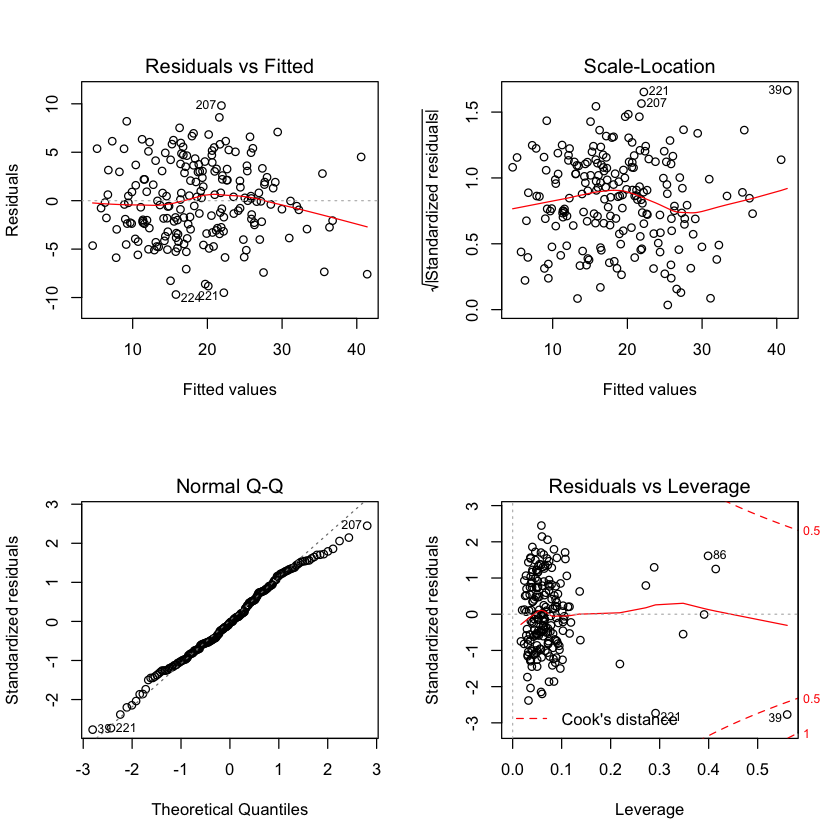

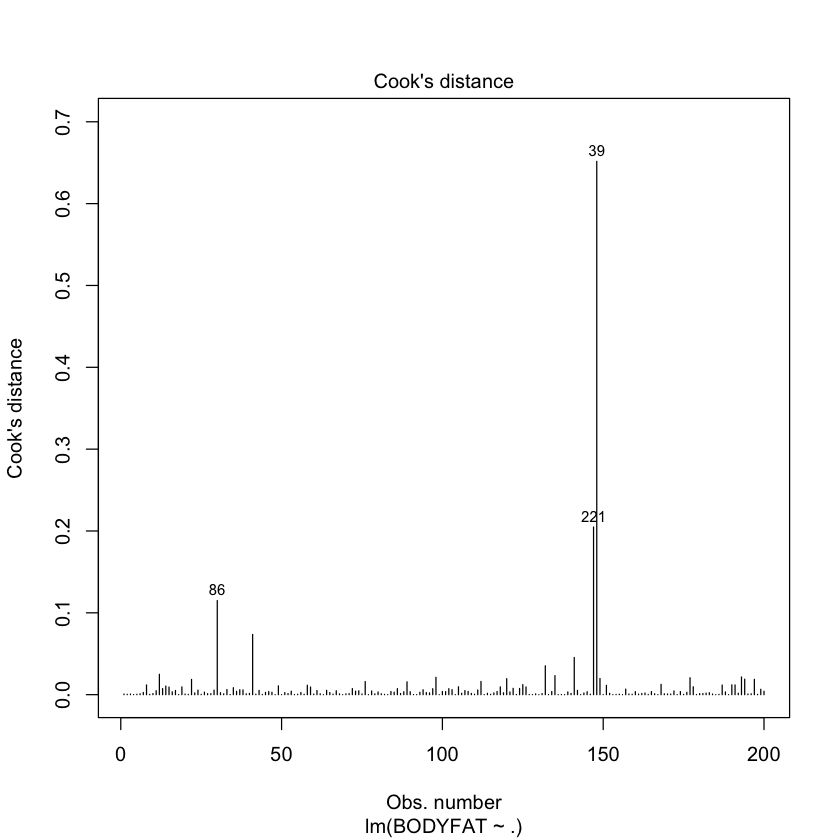

In [12]:
summary(model <- lm(BODYFAT ~ ., data=bodyfat[-37,-2]))
layout(matrix(1:4, ncol=2))
plot(model)
layout(matrix(1))
plot(model, which=4)

The 39th guy weights 363 pounds. Let’s say we remove him from the model as well.

In [13]:
new_train<-train[c(-37,-149),]
save(new_train,file = "new_train.Rdata")